<h1>Data Exploration

<p>
    Der Business Usecase ist:<br>
    <ul>
        <li>Die Preise in Deutschland zu Zeigen.</li>
        <li>Wie haben sie sich über die letzten Jahre Verändert.</li>
        <li>Wie verhält sich der Preis im vergleich zu Ballungszentren.</li>
        <li>Neben den Geografischenlage, was sind Interesante Attribute für die Geselschafft.</li>  
    </ul>
</p>

<h3>Information</h3>
Eliminate: Date, telekomHybridUploadSpeed, noParkSpaces, heatingCosts, energyEfficiencyClass, lastRefurbish, electricityBasePrice, electricityKwhPrice,

Make a Seperate Thing: Description, Facilities

Make a Seperate Thing: Do a Card with Regio 1,2,3

<h2>First Data Contact

In [2]:
#import 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import urllib.parse
import time

In [4]:
#Load data 
path = "immo_data.csv"
df = pd.read_csv(path)
pd.set_option('display.max_columns', None)
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [6]:
df.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,2.688500e+05,268850.000000,268850.000000,268850.000000,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,6.941294e+02,74.355548,3.765256,37283.022235,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,1.953602e+04,254.759208,2.214357,27798.037296,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,0.000000e+00,0.000000,1.000000,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,3.380000e+02,54.000000,2.000000,9128.000000,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,4.900000e+02,67.320000,3.000000,38667.000000,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,7.990000e+02,87.000000,5.000000,57072.000000,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,9.999999e+06,111111.000000,9.000000,99998.000000,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


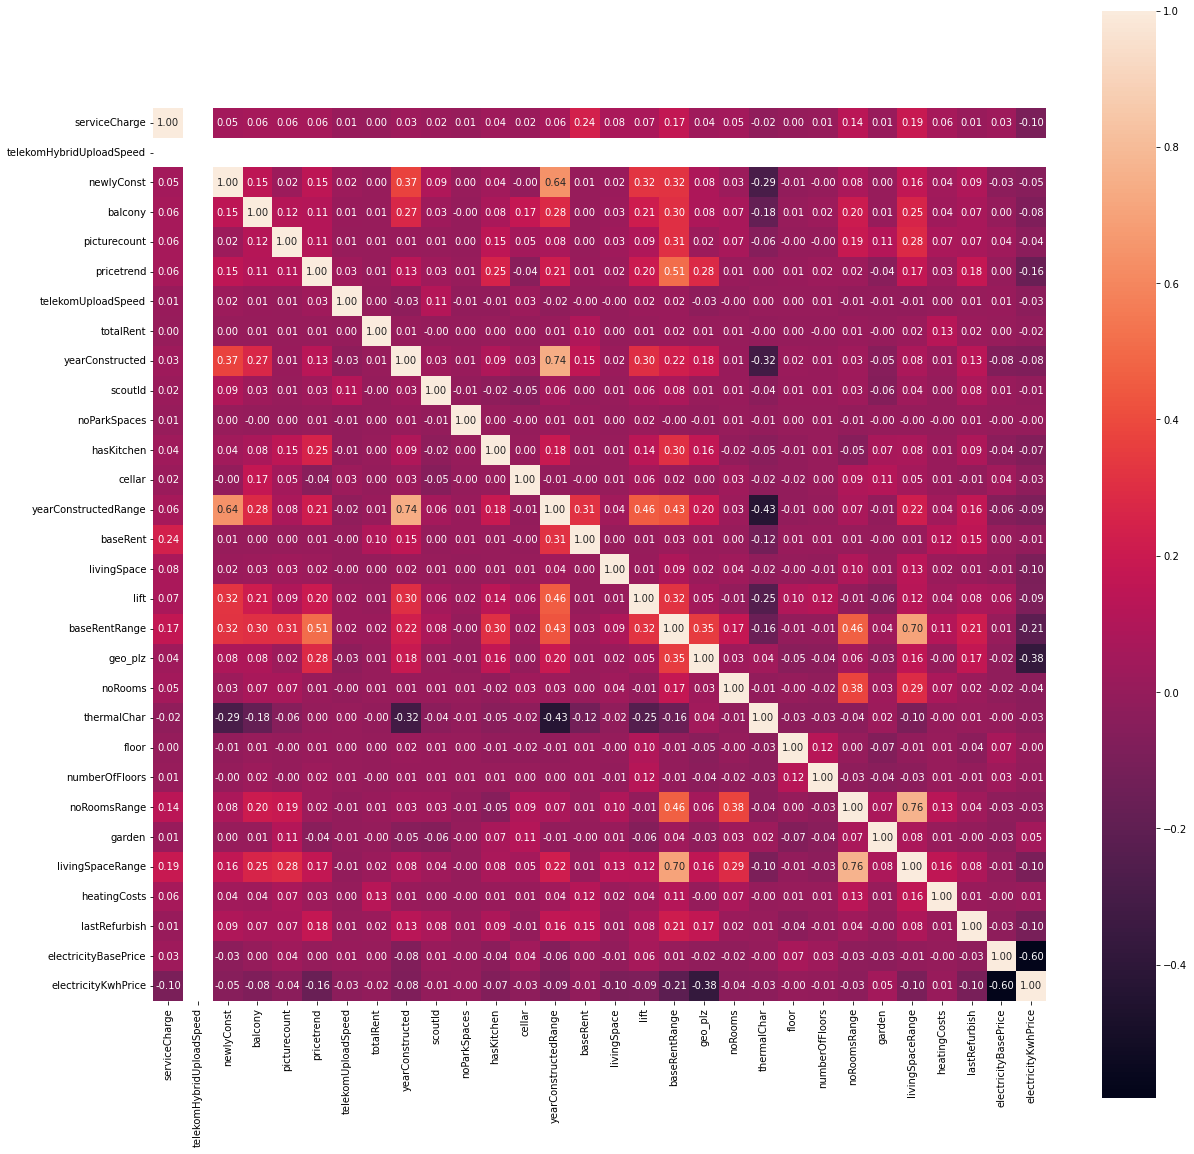

In [7]:
correlation_matrix(df)

<h2> Data Cleaning </h2>

<h3>Handeling Null Data

<p>It is importand to think about what to do with Null Data and see how much Null there is in a Data Set.

In [8]:
df.isna().sum()/len(df)

regio1                      0.000000
serviceCharge               0.025698
heatingType                 0.166844
telekomTvOffer              0.121328
telekomHybridUploadSpeed    0.832546
newlyConst                  0.000000
balcony                     0.000000
picturecount                0.000000
pricetrend                  0.006814
telekomUploadSpeed          0.124077
totalRent                   0.150705
yearConstructed             0.212182
scoutId                     0.000000
noParkSpaces                0.653889
firingTypes                 0.211880
hasKitchen                  0.000000
geo_bln                     0.000000
cellar                      0.000000
yearConstructedRange        0.212182
baseRent                    0.000000
houseNumber                 0.264155
livingSpace                 0.000000
geo_krs                     0.000000
condition                   0.254748
interiorQual                0.419063
petsAllowed                 0.426160
street                      0.000000
s

In [9]:
#returns the attributs that have more than 50% null
df.columns[((df.isna().sum()/len(df)) > 0.50)]

Index(['telekomHybridUploadSpeed', 'noParkSpaces', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')

<ul>
    <li>telekomHybridUploadSpeed = 83% null (to much null to set with mean and no real corelation to price)
    <li>noParkSpaces = 65% (Will be replaced with 0)
    <li>heatingCosts = 68% (To big range to change it with mean) ?
    <li>energyEfficiencyClass = 71% (To little Corelation and to many missing)
    <li>lastRefurbish = 70% (A lot of wrong Data and a hight rate if Nan will be cut)
    <li>electricityBasePrice = 82% (Sind seit 2020 veraltet, und viele Fehlende Daten, will be cut)
    <li>electricityKwhPrice = 82% (Cut out, small range of Values and to many Nan)
</ul>
<p> Paralele Auswertung zu einzelen Attributen machen.

In [10]:
#to see what kind of data is inside if the attributes
#set_maker(df,"noParkSpaces")
df['noParkSpaces'].value_counts()

1.0       78814
2.0        8955
0.0        3855
3.0         417
4.0         137
          ...  
37.0          1
73.0          1
310.0         1
2241.0        1
58.0          1
Name: noParkSpaces, Length: 71, dtype: int64

In [11]:
#drops Colums
df = df.drop(columns=df.columns[((df.isna().sum()/len(df)) > 0.66)])
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln', 'cellar',
       'yearConstructedRange', 'baseRent', 'houseNumber', 'livingSpace',
       'geo_krs', 'condition', 'interiorQual', 'petsAllowed', 'street',
       'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat', 'geo_plz',
       'noRooms', 'thermalChar', 'floor', 'numberOfFloors', 'noRoomsRange',
       'garden', 'livingSpaceRange', 'regio2', 'regio3', 'description',
       'facilities', 'date'],
      dtype='object')

In [12]:
#since No. of Parkingspaces are importat for a Arppartmet I think they would put them in the offering
#seting noParkings. fro Nan to 0
df["noParkSpaces"] = df["noParkSpaces"].fillna(value=0)

<h3>Handeling Inappropriate and unuseful Data

In [13]:
#drop Data pionts in "baseRent" with the Values 0.0
df = drop_inappropriate(df,"baseRent", 0.0)

There are 89 inappropriate Data Points with the Value 0.0
The Datapiont have been Droped, the shape if the Dataframe is now (268761, 43)


In [14]:
#drop Data pionts in "livingSpace" with the Values 0.0
df = drop_inappropriate(df,"livingSpace", 0.0)

There are 64 inappropriate Data Points with the Value 0.0
The Datapiont have been Droped, the shape if the Dataframe is now (268697, 43)


In [15]:
#drop Data pionts in "floor" with the Values bigger than 50
#there are no rental objects higher than 50 floors
df = drop_inappropriate_bigger(df,"floor", 50)

There are 28 inappropriate Data Points with the Value bigger than 50
The Datapiont have been Droped, the shape if the Dataframe is now (268669, 43)


In [16]:
#drop Data pionts in "numberOfFloors" with the Values bigger than 50
#there are no rental objects higher than 50 floors
df = drop_inappropriate_bigger(df,"numberOfFloors", 50)

There are 20 inappropriate Data Points with the Value bigger than 50
The Datapiont have been Droped, the shape if the Dataframe is now (268649, 43)


In [17]:
#drop Data pionts in "noParkSpaces" with the Values bigger than 30
df = drop_inappropriate_bigger(df,"noParkSpaces", 30)

There are 226 inappropriate Data Points with the Value bigger than 30
The Datapiont have been Droped, the shape if the Dataframe is now (268423, 43)


In [18]:
#Insprect the Dataframe
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.0,NaN,1964.0,108890903,0.0,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,0.0,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,Feb20


<h3> Explanation</h3>
    <ul>
        <li>description = No need because there are no direct information on the House Price, could be explord in side Project
        <li>livingSpaceRange = Is reprecented in other Attributes.
        <li>scoutId = Just a Immoscout intern ID
        <li>street = Not importat
        <li>streetPlain = Same as Steet Name
        <li>houseNumber = Not important
        <li>date = Just the scraping date.
        <li>facilities = Same as Description
        <li>totalRent = is just a combination of Rent and serviceCharges, still has no correlation
        <li>telekomUploadSpeed = Has no Corralation and makes no sens to keep everyone can choose the Speed they want to pay for

In [19]:
#drop Attributes that are unimportant 
df = df.drop(columns=['description','livingSpaceRange','scoutId','street','streetPlain','houseNumber','date','facilities','totalRent','telekomUploadSpeed'])

<h3> Handeling Nan Data that can not be fild with mean </h3>

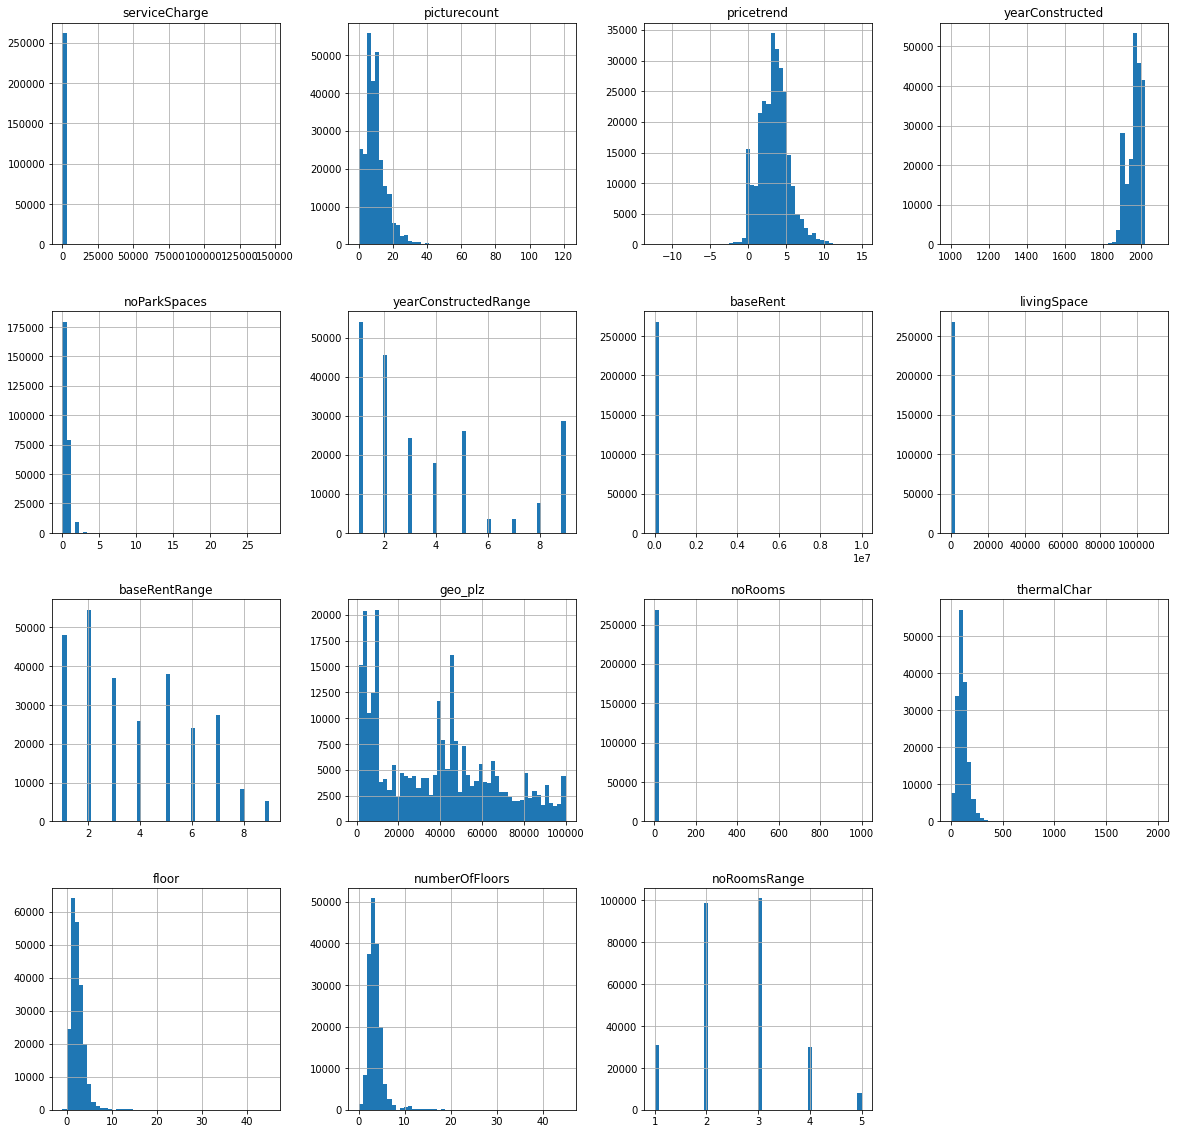

In [20]:
pd_hist(df,50)

In [21]:
df = drop_inappropriate_bigger(df,"serviceCharge", 1000)
df = drop_inappropriate_smaller(df,"serviceCharge", 0)
#should i up the number for smaller?

There are 134 inappropriate Data Points with the Value bigger than 1000
The Datapiont have been Droped, the shape if the Dataframe is now (268289, 33)
There are 3414 inappropriate Data Points with the Value smaller than 0
The Datapiont have been Droped, the shape if the Dataframe is now (264875, 33)


In [22]:
df = drop_inappropriate_bigger(df,"livingSpace", 500)
#should i cut out all sqm over 10.000 found no rental object that that big, also it should be just the living area so 500-1000 would also possible to cut out

There are 16 inappropriate Data Points with the Value bigger than 500
The Datapiont have been Droped, the shape if the Dataframe is now (264859, 33)


In [23]:
df = drop_inappropriate_bigger(df,"noRooms", 20)

There are 22 inappropriate Data Points with the Value bigger than 20
The Datapiont have been Droped, the shape if the Dataframe is now (264837, 33)


In [24]:
#drop Data pionts in "baseRent" with the Values bigger than 10.000€
df = drop_inappropriate_bigger(df,"baseRent", 10000)

There are 14 inappropriate Data Points with the Value bigger than 10000
The Datapiont have been Droped, the shape if the Dataframe is now (264823, 33)


In [25]:
df = drop_inappropriate_smaller(df,"yearConstructed", 1900) #1900
df = drop_inappropriate_bigger(df,"yearConstructed", 2025) #2025

There are 18058 inappropriate Data Points with the Value smaller than 1900
The Datapiont have been Droped, the shape if the Dataframe is now (246765, 33)
There are 5 inappropriate Data Points with the Value bigger than 2025
The Datapiont have been Droped, the shape if the Dataframe is now (246760, 33)


In [26]:
#it is important on witch floor the flat is as long as it's not on 0 (ground Floor) so every Nan will be replaced with 0 
#because taking a mean or median would not make sence
#some people have put 1 for the ground floor and some 0 soo? What to do?
df["floor"] = df["floor"].fillna(value=0)

In [27]:
df["petsAllowed"].value_counts()

negotiable    84323
no            47627
yes            9586
Name: petsAllowed, dtype: int64

In [28]:
df["petsAllowed"] = df["petsAllowed"].fillna(value='no')
df["petsAllowed"] = df["petsAllowed"].replace(['no'],False)
df["petsAllowed"] = df["petsAllowed"].replace(['yes'],True)

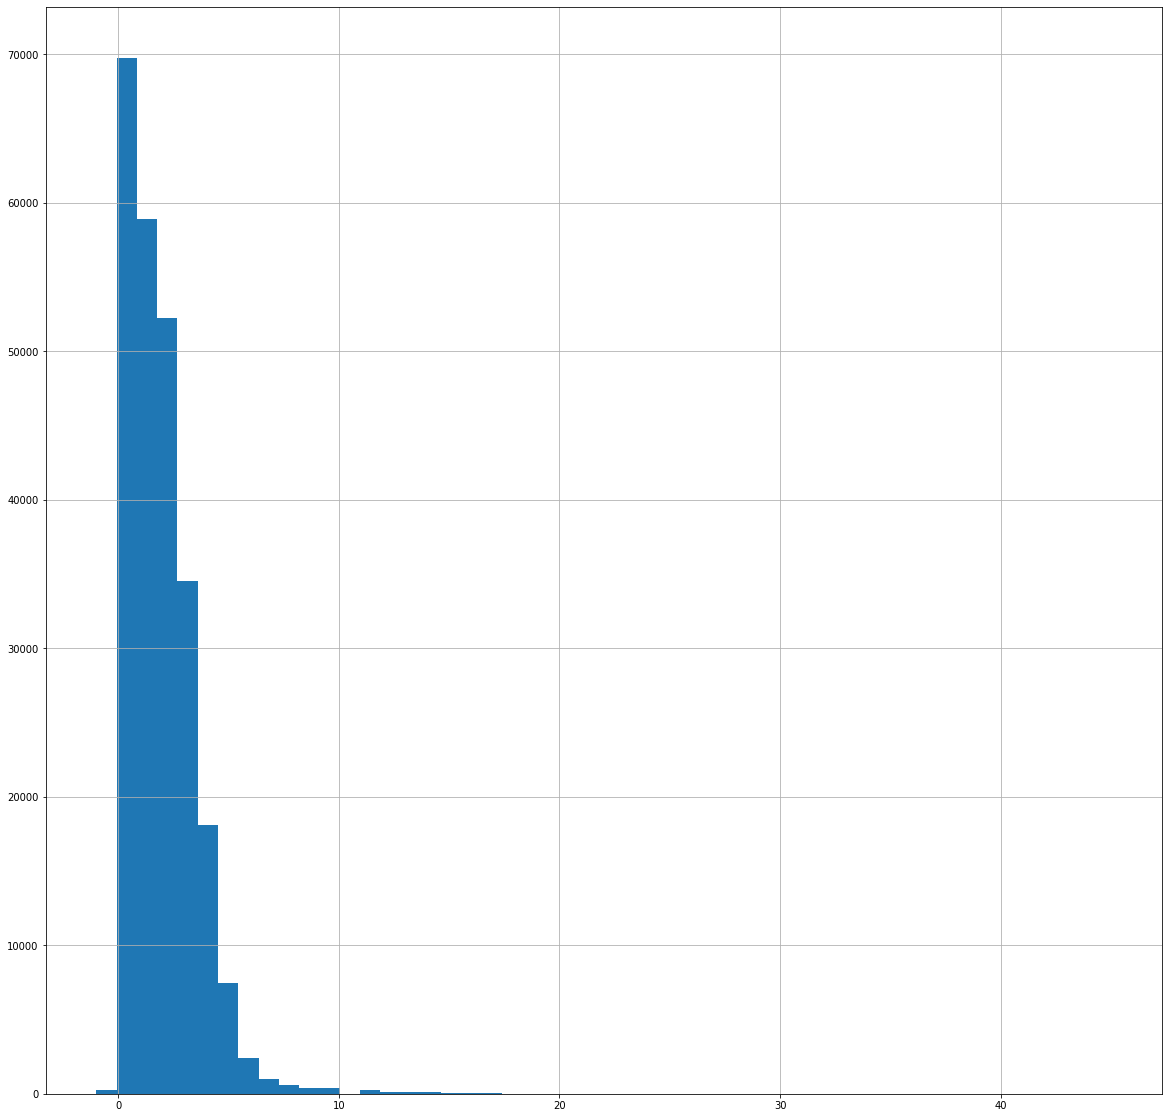

In [29]:
pd_hist(df,50,"floor")

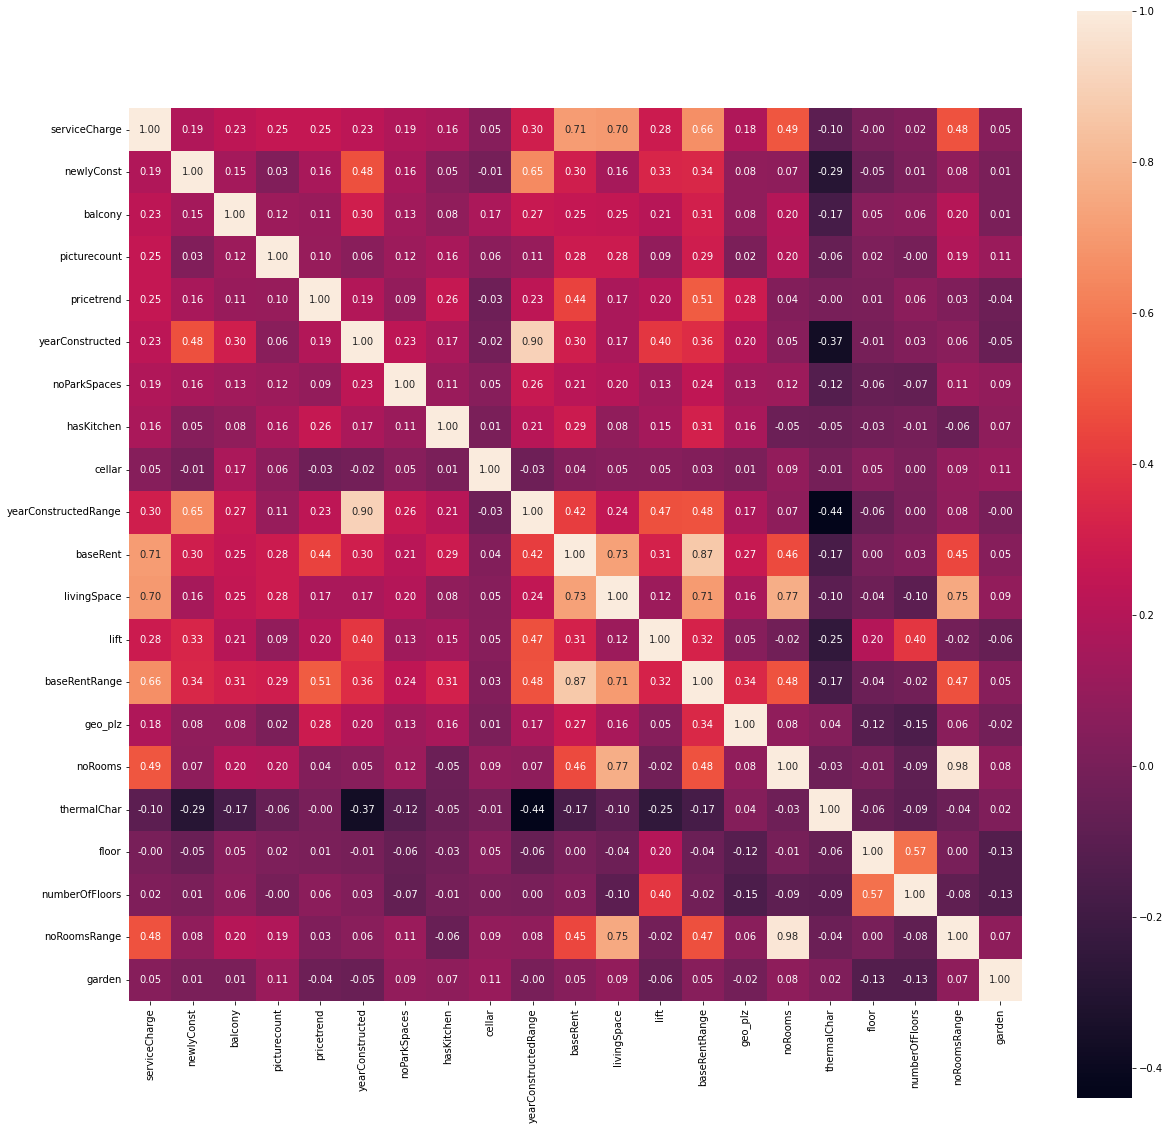

In [30]:
correlation_matrix(df)

<h3>Fill Numeric Nan with mean

In [31]:
#See the Mean of the Data
df._get_numeric_data().mean()

serviceCharge             151.251391
newlyConst                  0.085188
balcony                     0.631889
picturecount                9.631338
pricetrend                  3.381823
yearConstructed          1974.629068
noParkSpaces                0.408766
hasKitchen                  0.339698
cellar                      0.652002
yearConstructedRange        3.969533
baseRent                  635.084708
livingSpace                73.212583
lift                        0.240250
baseRentRange               3.731152
geo_plz                 37838.195745
noRooms                     2.633561
thermalChar               113.406271
floor                       1.705179
numberOfFloors              3.523925
noRoomsRange                2.577322
garden                      0.193646
dtype: float64

In [32]:
df._get_numeric_data().median()

serviceCharge             136.00
newlyConst                  0.00
balcony                     1.00
picturecount                9.00
pricetrend                  3.39
yearConstructed          1976.00
noParkSpaces                0.00
hasKitchen                  0.00
cellar                      1.00
yearConstructedRange        3.00
baseRent                  490.00
livingSpace                67.30
lift                        0.00
baseRentRange               3.00
geo_plz                 39110.00
noRooms                     3.00
thermalChar               105.60
floor                       1.00
numberOfFloors              3.00
noRoomsRange                3.00
garden                      0.00
dtype: float64

In [33]:
df._get_numeric_data().isna().sum()

serviceCharge            6588
newlyConst                  0
balcony                     0
picturecount                0
pricetrend               1738
yearConstructed         56062
noParkSpaces                0
hasKitchen                  0
cellar                      0
yearConstructedRange    56062
baseRent                    0
livingSpace                 0
lift                        0
baseRentRange               0
geo_plz                     0
noRooms                     0
thermalChar             96966
floor                       0
numberOfFloors          88472
noRoomsRange                0
garden                      0
dtype: int64

In [34]:
#fill the Nan
df.fillna(df._get_numeric_data().mean(),inplace = True)

In [35]:
#See how many Nan are still in the Data Frame
df.isna().sum()

regio1                       0
serviceCharge                0
heatingType              40566
telekomTvOffer           29822
newlyConst                   0
balcony                      0
picturecount                 0
pricetrend                   0
yearConstructed              0
noParkSpaces                 0
firingTypes              52705
hasKitchen                   0
geo_bln                      0
cellar                       0
yearConstructedRange         0
baseRent                     0
livingSpace                  0
geo_krs                      0
condition                62266
interiorQual            103117
petsAllowed                  0
lift                         0
baseRentRange                0
typeOfFlat               31964
geo_plz                      0
noRooms                      0
thermalChar                  0
floor                        0
numberOfFloors               0
noRoomsRange                 0
garden                       0
regio2                       0
regio3  

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246760 entries, 0 to 268849
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                246760 non-null  object 
 1   serviceCharge         246760 non-null  float64
 2   heatingType           206194 non-null  object 
 3   telekomTvOffer        216938 non-null  object 
 4   newlyConst            246760 non-null  bool   
 5   balcony               246760 non-null  bool   
 6   picturecount          246760 non-null  int64  
 7   pricetrend            246760 non-null  float64
 8   yearConstructed       246760 non-null  float64
 9   noParkSpaces          246760 non-null  float64
 10  firingTypes           194055 non-null  object 
 11  hasKitchen            246760 non-null  bool   
 12  geo_bln               246760 non-null  object 
 13  cellar                246760 non-null  bool   
 14  yearConstructedRange  246760 non-null  float64
 15  

<p> Numeric Data (21) : 
  <ul>
    <li> serviceCharge </li>
    <li> picturecount </li>
    <li> pricetrend </li>
    <li> yearConstructed </li>
    <li> noParkSpaces </li>
    <li> yearConstructedRange </li>
    <li> baseRent </li>
    <li> livingSpace </li>
    <li> baseRentRange </li>
    <li> geo_plz </li>
    <li> noRooms </li>
    <li> thermalChar </li>
    <li> floor </li>
    <li> numberOfFloors </li>
    <li> noRoomsRange </li>
    <li> newlyConst </li>
    <li> balcony </li>
    <li> hasKitchen </li>
    <li> cellar </li>
    <li> lift </li>
    <li> garden </li>
   </ul>
  Catgorical Data (12):
    <ul>
    <li> regio1 </li>
    <li> heatingType </li>
    <li> telekomTvOffer </li>
    <li> firingTypes</li>
    <li> geo_bln </li>
    <li> geo_krs </li>
    <li> condition </li>
    <li> interiorQual </li>
    <li> petsAllowed </li>
    <li> typeOfFlat </li>
    <li> regio2 </li>
    <li> regio3 </li>
     </ul>            

In [37]:
df.head(20)

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,yearConstructed,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,livingSpace,geo_krs,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,regio2,regio3
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,1965.000000,1.0,oil,False,Nordrhein_Westfalen,True,2.000000,595.00,86.00,Dortmund,well_kept,normal,False,False,4,ground_floor,44269,4.0,181.400000,1.0,3.000000,4,True,Dortmund,Schüren
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2019.000000,1.0,NaN,False,Sachsen,True,9.000000,965.00,83.80,Dresden,first_time_use,sophisticated,False,True,6,apartment,1097,3.0,113.406271,3.0,4.000000,3,False,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,1964.000000,0.0,district_heating,False,Sachsen,False,2.000000,343.00,58.15,Mittelsachsen_Kreis,NaN,NaN,False,False,2,other,9599,3.0,86.000000,3.0,3.523925,3,False,Mittelsachsen_Kreis,Freiberg
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,1950.000000,0.0,gas,False,Bremen,False,1.000000,765.00,84.97,Bremen,refurbished,NaN,False,False,5,apartment,28213,3.0,188.900000,1.0,3.523925,3,False,Bremen,Neu_Schwachhausen
5,Schleswig_Holstein,142.00,gas_heating,NONE,False,True,5,4.48,1999.000000,0.0,gas,True,Schleswig_Holstein,False,5.000000,315.20,53.43,Schleswig_Flensburg_Kreis,well_kept,NaN,False,False,2,apartment,24891,2.0,165.000000,0.0,3.523925,2,False,Schleswig_Flensburg_Kreis,Struxdorf
6,Sachsen,70.00,self_contained_central_heating,ONE_YEAR_FREE,False,False,9,1.01,1974.629068,0.0,NaN,False,Sachsen,True,3.969533,310.00,62.00,Mittelsachsen_Kreis,fully_renovated,NaN,False,False,2,NaN,9599,2.0,113.406271,1.0,4.000000,2,True,Mittelsachsen_Kreis,Freiberg
7,Bremen,88.00,central_heating,ONE_YEAR_FREE,False,True,5,1.89,1959.000000,0.0,gas:electricity,False,Bremen,True,2.000000,452.25,60.30,Bremen,NaN,NaN,False,False,3,ground_floor,28717,3.0,63.000000,0.0,3.523925,3,False,Bremen,St._Magnus
8,Baden_Württemberg,110.00,oil_heating,ONE_YEAR_FREE,False,False,5,3.77,1970.000000,1.0,oil,True,Baden_Württemberg,True,2.000000,580.00,53.00,Emmendingen_Kreis,well_kept,sophisticated,False,False,4,roof_storey,79211,2.0,138.000000,2.0,2.000000,2,False,Emmendingen_Kreis,Denzlingen
9,Nordrhein_Westfalen,95.00,self_contained_central_heating,ONE_YEAR_FREE,False,False,7,1.92,1953.000000,0.0,gas,False,Nordrhein_Westfalen,True,2.000000,300.00,60.00,Gelsenkirchen,well_kept,normal,negotiable,False,1,apartment,45888,2.5,207.700000,2.0,5.000000,2,False,Gelsenkirchen,Bulmke_Hüllen
10,Sachsen,88.00,NaN,ONE_YEAR_FREE,False,True,11,0.21,1930.000000,0.0,gas,False,Sachsen,True,1.000000,219.00,40.20,Chemnitz,NaN,normal,False,False,1,apartment,9130,2.0,123.000000,3.0,3.523925,2,False,Chemnitz,Sonnenberg


<h2> Data Visualization <h2>

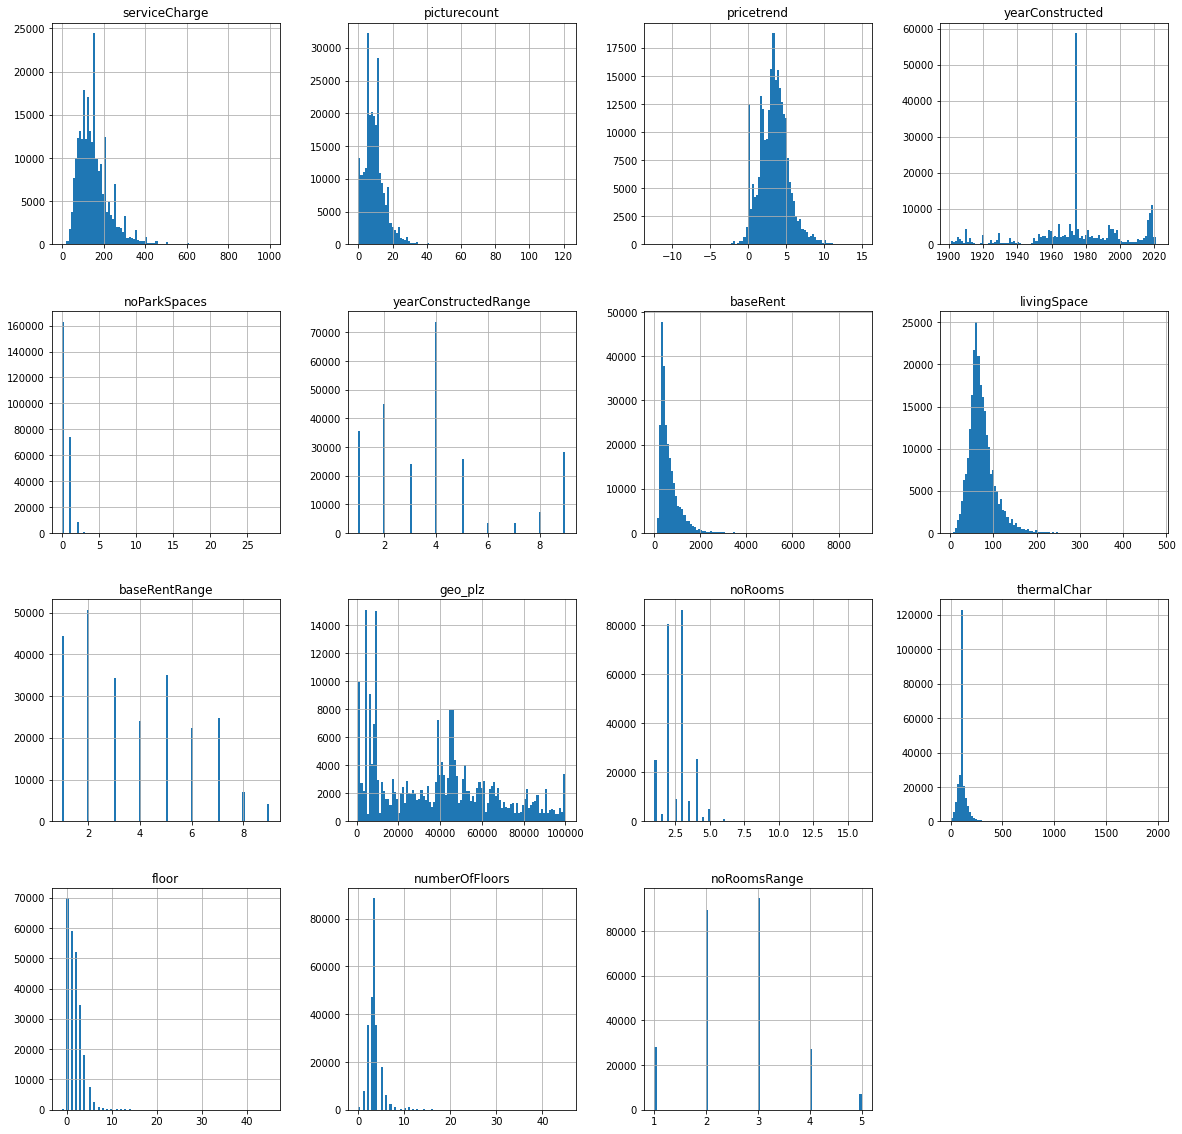

In [38]:
hist = df.hist(bins=100,figsize=(20,20))

In [39]:
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'yearConstructed', 'noParkSpaces', 'firingTypes', 'hasKitchen',
       'geo_bln', 'cellar', 'yearConstructedRange', 'baseRent', 'livingSpace',
       'geo_krs', 'condition', 'interiorQual', 'petsAllowed', 'lift',
       'baseRentRange', 'typeOfFlat', 'geo_plz', 'noRooms', 'thermalChar',
       'floor', 'numberOfFloors', 'noRoomsRange', 'garden', 'regio2',
       'regio3'],
      dtype='object')

KeyboardInterrupt: 

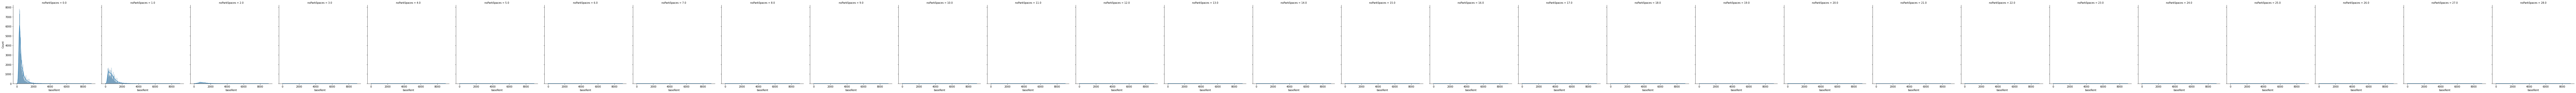

In [49]:
#displot(df,"noParkSpaces","baseRent")

<h3> Development of rental prices in relation to the variables with the highest correlations </h3>
    <p>
    <li> Living Space 
    <li> Service Charge 

<AxesSubplot:xlabel='livingSpace', ylabel='baseRent'>

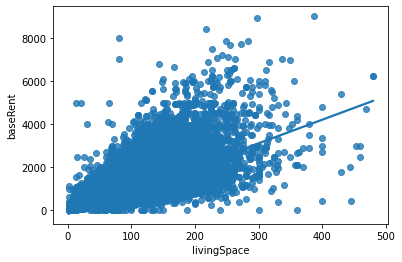

In [41]:
sns.regplot(x='livingSpace', y='baseRent', data=df)

<AxesSubplot:xlabel='serviceCharge', ylabel='baseRent'>

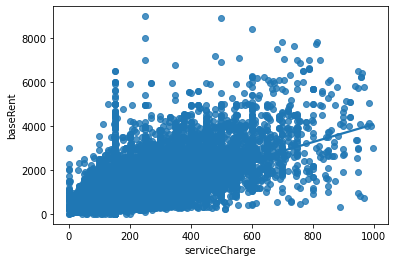

In [42]:
sns.regplot(x = 'serviceCharge', y= 'baseRent', data=df)

<h3> Rental prices in comparison of the German states </h3>

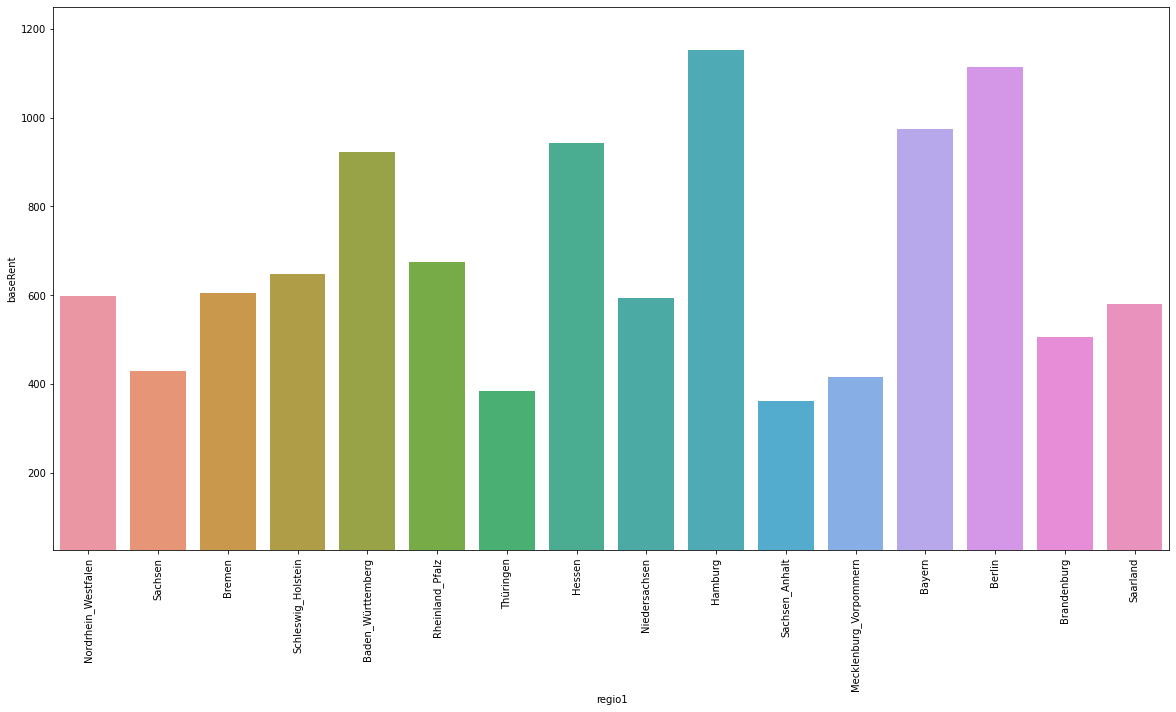

In [48]:
plt.figure(figsize=(20,10))

sns.barplot(x=df.regio1, y=df.baseRent, ci = None)
plt.ylim([25, 1250])
plt.xticks(rotation='vertical')
plt.show()

## First Price Prediction System

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [44]:
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,yearConstructed,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,livingSpace,geo_krs,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,regio2,regio3
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,1965.0,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,86.00,Dortmund,well_kept,normal,False,False,4,ground_floor,44269,4.0,181.400000,1.0,3.000000,4,True,Dortmund,Schüren
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2019.0,1.0,NaN,False,Sachsen,True,9.0,965.0,83.80,Dresden,first_time_use,sophisticated,False,True,6,apartment,1097,3.0,113.406271,3.0,4.000000,3,False,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,1964.0,0.0,district_heating,False,Sachsen,False,2.0,343.0,58.15,Mittelsachsen_Kreis,NaN,NaN,False,False,2,other,9599,3.0,86.000000,3.0,3.523925,3,False,Mittelsachsen_Kreis,Freiberg
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,1950.0,0.0,gas,False,Bremen,False,1.0,765.0,84.97,Bremen,refurbished,NaN,False,False,5,apartment,28213,3.0,188.900000,1.0,3.523925,3,False,Bremen,Neu_Schwachhausen
5,Schleswig_Holstein,142.00,gas_heating,NONE,False,True,5,4.48,1999.0,0.0,gas,True,Schleswig_Holstein,False,5.0,315.2,53.43,Schleswig_Flensburg_Kreis,well_kept,NaN,False,False,2,apartment,24891,2.0,165.000000,0.0,3.523925,2,False,Schleswig_Flensburg_Kreis,Struxdorf


In [45]:
# what to do whit "petsAllowed" there is True False and Maybe
X = np.asarray(df[['serviceCharge','newlyConst', 'balcony', 'picturecount', 'pricetrend','yearConstructed', 'noParkSpaces', 'hasKitchen', 'cellar', 'yearConstructedRange', 'livingSpace', 'lift','baseRentRange', 'geo_plz', 'noRooms', 'thermalChar','floor', 'numberOfFloors', 'noRoomsRange', 'garden']])
Y = np.asarray(df['baseRent'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  0.8127474417131921
Weights:  [ 8.68361971e-01  3.69942872e+01 -2.40497613e+01 -1.40583625e-02
  1.09025577e+01 -6.78180529e-01 -3.60875369e+00  3.74442029e+01
  1.20235595e+01  8.47381784e+00  4.30686230e+00  1.21079239e+01
  1.25452952e+02 -2.47782883e-04  2.32111890e+01 -8.62743434e-02
  7.32795429e+00  7.68164314e+00 -7.94097604e+01 -2.11900661e+00]


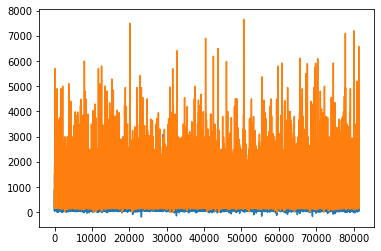

In [46]:
lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

Score:  0.8127474965421669
Weights:  [ 8.68363322e-01  3.69915088e+01 -2.40493417e+01 -1.40517231e-02
  1.09027355e+01 -6.78199384e-01 -3.60869294e+00  3.74438158e+01
  1.20233430e+01  8.47423694e+00  4.30687857e+00  1.21078766e+01
  1.25452579e+02 -2.47773767e-04  2.32031036e+01 -8.62737538e-02
  7.32793139e+00  7.68164779e+00 -7.94013412e+01 -2.11888222e+00]


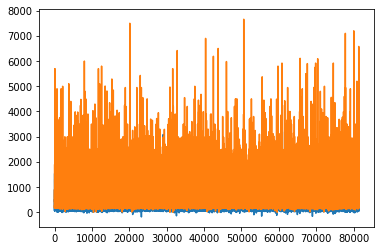

In [47]:
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [48]:
df_test = df[['serviceCharge','newlyConst', 'balcony', 'picturecount', 'pricetrend','yearConstructed', 'noParkSpaces', 'hasKitchen', 'cellar', 'yearConstructedRange', 'livingSpace', 'lift','baseRentRange', 'geo_plz', 'noRooms', 'thermalChar','floor', 'numberOfFloors', 'noRoomsRange', 'garden']]
df_pred = df_test.head(5)
reg.predict(df_pred)
#reg.predict([[255,  True, True,  8,  2.72, 2019, 1, False, True, 9.0, 83.8, True, 6, 1097, 3.0, 114.6, 3.0, 4, 3, False]])

c:\users\jaxxi\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


array([ 707.56736906, 1081.9022562 ,  202.76297623,  746.84409664,
        350.20545915])

In [49]:
df.head(5)

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,yearConstructed,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,livingSpace,geo_krs,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,regio2,regio3
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,1965.0,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,86.00,Dortmund,well_kept,normal,False,False,4,ground_floor,44269,4.0,181.400000,1.0,3.000000,4,True,Dortmund,Schüren
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2019.0,1.0,NaN,False,Sachsen,True,9.0,965.0,83.80,Dresden,first_time_use,sophisticated,False,True,6,apartment,1097,3.0,113.406271,3.0,4.000000,3,False,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,1964.0,0.0,district_heating,False,Sachsen,False,2.0,343.0,58.15,Mittelsachsen_Kreis,NaN,NaN,False,False,2,other,9599,3.0,86.000000,3.0,3.523925,3,False,Mittelsachsen_Kreis,Freiberg
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,1950.0,0.0,gas,False,Bremen,False,1.0,765.0,84.97,Bremen,refurbished,NaN,False,False,5,apartment,28213,3.0,188.900000,1.0,3.523925,3,False,Bremen,Neu_Schwachhausen
5,Schleswig_Holstein,142.00,gas_heating,NONE,False,True,5,4.48,1999.0,0.0,gas,True,Schleswig_Holstein,False,5.0,315.2,53.43,Schleswig_Flensburg_Kreis,well_kept,NaN,False,False,2,apartment,24891,2.0,165.000000,0.0,3.523925,2,False,Schleswig_Flensburg_Kreis,Struxdorf


## Map of Germany

In [36]:
#Load Location Data
path_plz = "plz_geocoord.csv"
df_plz = pd.read_csv(path_plz)
pd.set_option('display.max_columns', None)
df_plz.columns = ['plz', 'lat', 'lon']
df_plz = df_plz.set_index('plz')
df_plz.head(3)

FileNotFoundError: [Errno 2] No such file or directory: 'plz_geocoord.csv'

In [37]:
test_df = df.head(1000)

NameError: name 'df' is not defined

In [38]:
t0 = time.time()
for index, row in test_df.iterrows():
    lat_lon = get_lat_lon(row["geo_plz"],df_plz)
    test_df.loc[index, 'lat'] = lat_lon[0]
    test_df.loc[index, 'lon'] = lat_lon[1]

t1 = time.time()
total = t1-t0

print("It took {} Sec. to get {} Lat and Lon Data Pionts".format(total,test_df.shape[0]))
    
df.head()

NameError: name 'test_df' is not defined

In [ ]:
#create coloum
df["lat"] = np.nan
df["lon"] = np.nan
df.head()

In [39]:
t0 = time.time()

lat_lon = get_lat_lon("Freiburg")

t1 = time.time()
total = t1-t0

print("It took {} Sec. to get {} Lat and Lon Data Pionts".format(total,df.shape[0]))
    
#df.head()

NameError: name 'get_lat_lon' is not defined

In [40]:
test_df = df.head(1000)
print(test_df.shape[0])

NameError: name 'df' is not defined

In [41]:
t0 = time.time()
for index, row in test_df.iterrows():
    lat_lon = get_lat_lon(row["regio3"])
    df.loc[index, 'lat'] = lat_lon[0]
    df.loc[index, 'lon'] = lat_lon[1]

t1 = time.time()
total = t1-t0

print("It took {} Sec. to get {} Lat and Lon Data Pionts".format(total,df.shape[0]))
    
df.head()

NameError: name 'test_df' is not defined

In [42]:
from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
df['location'] = df['ADDRESS'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)

ModuleNotFoundError: No module named 'geopy'

In [43]:
df.head(13910)

NameError: name 'df' is not defined

## Functions for the Code

In [3]:
def correlation_matrix(df):
    corr = df.corr()
    f, ax = plt.subplots(figsize=(20, 20))
    sns.heatmap(corr, square = True,fmt='.2f' ,annot = True)
    
    
def set_maker(df,attribute):
    array = df[attribute].unique()
    help_list = array.tolist()
    attribute_set = set(help_list)
    print(attribute_set)
    if type(help_list[1]) == int or float:
        print("The mean of this Attribute is {}".format(df[attribute].mean()))
    elif type(help_list[1]) == str:
        print("Sorry there is no mean to figute out.")


def drop_inappropriate(df, attribute, inappropriate):
    i = df[df[attribute] == inappropriate].shape[0]
    print("There are {} inappropriate Data Points with the Value {}".format(i,inappropriate))
    df = df.drop(df[df[attribute] == inappropriate].index)
    print("The Datapiont have been Droped, the shape if the Dataframe is now {}".format(df.shape))
    return df

def drop_inappropriate_bigger(df, attribute, inappropriate):
    i = df[df[attribute] >= inappropriate].shape[0]
    print("There are {} inappropriate Data Points with the Value bigger than {}".format(i,inappropriate))
    df = df.drop(df[df[attribute] >= inappropriate].index)
    print("The Datapiont have been Droped, the shape if the Dataframe is now {}".format(df.shape))
    return df

def drop_inappropriate_smaller(df, attribute, inappropriate):
    i = df[df[attribute] <= inappropriate].shape[0]
    print("There are {} inappropriate Data Points with the Value smaller than {}".format(i,inappropriate))
    df = df.drop(df[df[attribute] <= inappropriate].index)
    print("The Datapiont have been Droped, the shape if the Dataframe is now {}".format(df.shape))
    return df

def get_lat_lon(plz, df_plz):
    try:
        lat = df_plz.loc[plz, 'lat']
        lon = df_plz.loc[plz, 'lon']  
    except:
        plz += 1
        get_lat_lon(plz,df)
        return lat, lon
    return lat, lon

def displot(df, x, y):
    sns.displot(data=df, x=df[y], col=df[x], kde=True)
    plt.show()
    
def pd_hist(df,bins,attribute=False):
    if bool(attribute) == True:
        test_df = df[attribute]
        hist = test_df.hist(bins=bins,figsize=(20,20))
    else:
        hist = df.hist(bins=bins,figsize=(20,20))

## Old Funtions

In [ ]:
'''
def get_lat_lon(address):
    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
    response = requests.get(url).json()
    if bool(response) == True:
        lat = response[0]["lat"]
        lon = response[0]["lon"]
    else:
        lat = np.nan
        lon = np.nan
    return lat, lon
    
    
'''